In [1]:
import pandas as pd
print('Pandas version: ', pd.__version__)

import numpy as np
print('NumPy version: ', np.__version__)

import matplotlib
print('Matplotlib version: ', matplotlib.__version__)

from matplotlib import pyplot as plt

import sklearn
print('Scikit-Learn version: ', sklearn.__version__)

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.cluster import KMeans


import pickle
print('Pickle version: ', pickle.format_version)

import sys
print('Sys version: ', sys.version[0:5])

from sys import exc_info

import ast

Pandas version:  1.4.2
NumPy version:  1.21.5
Matplotlib version:  3.5.1
Scikit-Learn version:  1.0.2
Pickle version:  4.0
Sys version:  3.9.1


In [4]:
ratings = pd.read_csv(r'G:\dbdata\MovieReview-2021-10-01.csv', usecols = ['userId', 'movieId','rating'])
print('Shape of ratings dataset is: ',ratings.shape, '\n')
print('Max values in dataset are \n',ratings.max(), '\n')
print('Min values in dataset are \n',ratings.min(), '\n') 

Shape of ratings dataset is:  (333, 3) 

Max values in dataset are 
 movieId    290157
userId         59
rating          5
dtype: int64 

Min values in dataset are 
 movieId    63
userId     19
rating      1
dtype: int64 



In [5]:
# Filtering data for only 4+ ratings
ratings = ratings[ratings['rating'] >= 4.0]
print('Shape of ratings dataset is: ',ratings.shape, '\n')
print('Max values in dataset are \n',ratings.max(), '\n')
print('Min values in dataset are \n',ratings.min(), '\n') 

Shape of ratings dataset is:  (240, 3) 

Max values in dataset are 
 movieId    290157
userId         59
rating          5
dtype: int64 

Min values in dataset are 
 movieId    63
userId     19
rating      4
dtype: int64 



In [6]:
users_fav_movies = ratings.loc[:, ['userId', 'movieId']]

In [7]:
users_fav_movies = ratings.reset_index(drop = True)

In [8]:
users_fav_movies.T

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
movieId,290157,11066,11010,63,862,97406,124057,629,8844,862,...,978,983,9886,9882,99002,9909,9945,9994,99479,9980
userId,59,59,59,59,59,58,58,58,58,58,...,19,19,19,19,19,19,19,19,19,19
rating,4,5,5,4,5,4,4,4,5,4,...,4,5,4,4,4,5,5,4,5,4


In [10]:
users_fav_movies.to_csv(r'G:\dbdata\favouritemovie_rating.csv')

In [11]:
def moviesListForUsers(users, users_data):
    # users = a list of users IDs
    # users_data = a dataframe of users favourite movies or users watched movies
    users_movies_list = []
    for user in users:
        users_movies_list.append(str(list(users_data[users_data['userId'] == user]['movieId'])).split('[')[1].split(']')[0])
    return users_movies_list

In [12]:
users = np.unique(users_fav_movies['userId'])
print(users.shape) 

(40,)


In [13]:
users_movies_list = moviesListForUsers(users, users_fav_movies)
print('Movies list for', len(users_movies_list), ' users')
print('A list of first 10 users favourite movies: \n', users_movies_list[:10]) 

Movies list for 40  users
A list of first 10 users favourite movies: 
 ['99040, 9844, 9964, 9922, 9798, 9772, 978, 983, 9886, 9882, 99002, 9909, 9945, 9994, 99479, 9980', '9994', '9894, 9945, 99479, 9994, 9964', '98499, 98505, 9879, 9922, 9909, 9894, 9945, 99479, 9980, 9994', '9835, 98499, 98505, 9879, 9894, 99002', '978, 9800, 9823, 9826, 99040, 99002, 9945, 9977, 9980', '95963, 9731, 9800, 983, 98499, 9882, 9894', '98499, 9945, 9994, 9909, 99040, 99002', '9671, 9731, 9802, 981, 9819, 9821, 9894, 9909, 9945, 9977, 9980', '9671, 9714, 9716, 9731, 9922, 9945, 9977']


In [14]:
def prepSparseMatrix(list_of_str):
    # list_of_str = A list, which contain strings of users favourite movies separate by comma ",".
    # It will return us sparse matrix and feature names on which sparse matrix is defined 
    # i.e. name of movies in the same order as the column of sparse matrix
    cv = CountVectorizer(token_pattern = r'[^\,\ ]+', lowercase = False)
    sparseMatrix = cv.fit_transform(list_of_str)
    return sparseMatrix.toarray(), cv.get_feature_names()

In [15]:
sparseMatrix, feature_names = prepSparseMatrix(users_movies_list)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
df_sparseMatrix = pd.DataFrame(sparseMatrix, index = users, columns = feature_names)
df_sparseMatrix

,10020,10057,10144,10149,10153,10155,10634,11010,11066,110972,...,99002,99040,9909,9922,9945,99479,9964,9977,9980,9994
19,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,1,1
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,1
22,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,1,1
23,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,1,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,0,0,1
27,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [17]:
first_6_users_SM = users_fav_movies[users_fav_movies['userId'].isin(users[:6])].sort_values('userId')
first_6_users_SM.T


,239,224,225,226,228,229,230,227,232,233,...,205,201,200,199,198,197,196,195,194,193
movieId,9980,99040,9844,9964,9798,9772,978,9922,9886,9882,...,9879,9980,9977,9945,99002,99040,9826,9823,9800,978
userId,19,19,19,19,19,19,19,19,19,19,...,23,24,24,24,24,24,24,24,24,24
rating,4,5,5,4,5,4,4,4,4,4,...,5,4,4,5,5,5,5,5,4,4


In [18]:
df_sparseMatrix.loc[np.unique(first_6_users_SM['userId']), 
                    list(map(str, np.unique(first_6_users_SM['movieId'])))]

,978,983,9772,9798,9800,9823,9826,9835,9844,9879,...,9945,9964,9977,9980,9994,98499,98505,99002,99040,99479
19,1,1,1,1,0,0,0,0,1,0,...,1,1,0,1,1,0,0,1,1,1
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
22,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,1,1,1,0,0,1
23,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,1,1,0,0
24,1,0,0,0,1,1,1,0,0,0,...,1,0,1,1,0,0,0,1,1,0


In [19]:
class elbowMethod():
    def __init__(self, sparseMatrix):
        self.sparseMatrix = sparseMatrix
        self.wcss = list()
        self.differences = list()
    def run(self, init, upto, max_iterations = 300):
        for i in range(init, upto + 1):
            kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = max_iterations, n_init = 10, random_state = 0)
            kmeans.fit(sparseMatrix)
            self.wcss.append(kmeans.inertia_)
        self.differences = list()
        for i in range(len(self.wcss)-1):
            self.differences.append(self.wcss[i] - self.wcss[i+1])
    def showPlot(self, boundary = 500, upto_cluster = None):
        if upto_cluster is None:
            WCSS = self.wcss
            DIFF = self.differences
        else:
            WCSS = self.wcss[:upto_cluster]
            DIFF = self.differences[:upto_cluster - 1]
        plt.figure(figsize=(15, 6))
        plt.subplot(121).set_title('Elbow Method Graph')
        plt.plot(range(1, len(WCSS) + 1), WCSS)
        plt.grid(b = True)
        plt.subplot(122).set_title('Differences in Each Two Consective Clusters')
        len_differences = len(DIFF)
        X_differences = range(1, len_differences + 1)
        plt.plot(X_differences, DIFF)
        plt.plot(X_differences, np.ones(len_differences)*boundary, 'r')
        plt.plot(X_differences, np.ones(len_differences)*(-boundary), 'r')
        plt.grid()
        plt.show()

In [20]:
elbow_method = elbowMethod(sparseMatrix)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Program Files\KMSpico\temp\ipykernel_16400\1922062577.py:24: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b = True)


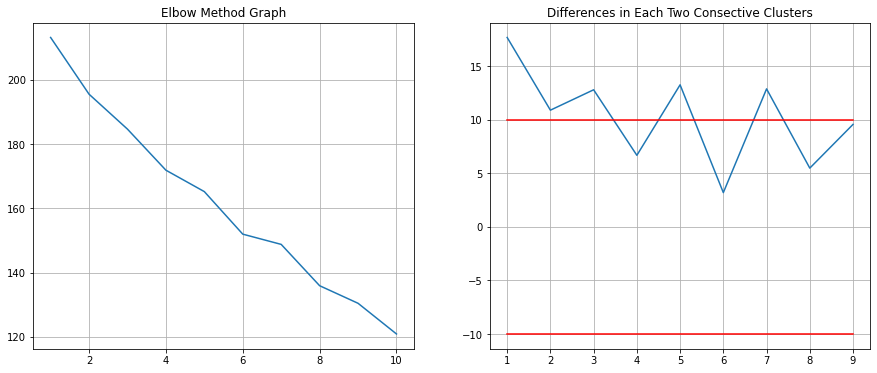

In [21]:
elbow_method.run(1, 10)
elbow_method.showPlot(boundary = 10)

C:\Program Files\KMSpico\temp\ipykernel_16400\1922062577.py:24: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b = True)


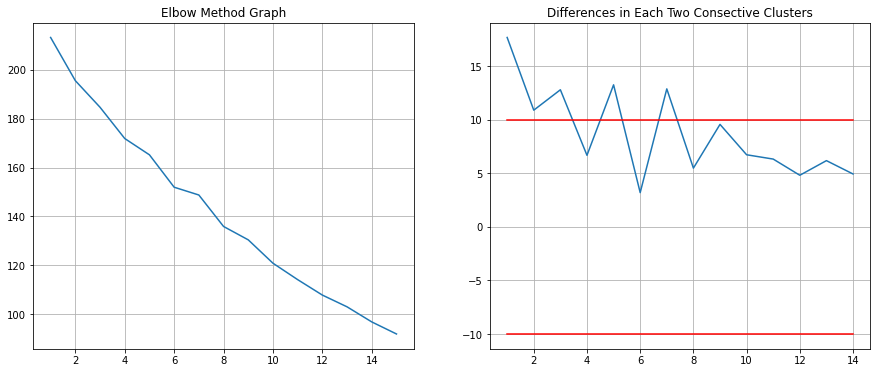

In [22]:
elbow_method.run(11, 15)
elbow_method.showPlot(boundary = 10)

In [23]:
kmeans = KMeans(n_clusters=8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
clusters = kmeans.fit_predict(sparseMatrix)

In [24]:
users_cluster = pd.DataFrame(np.concatenate((users.reshape(-1,1),
                                             clusters.reshape(-1,1)), axis = 1), columns = ['userId', 'Cluster'])
users_cluster.T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
userId,19,20,21,22,23,24,25,26,27,28,...,50,51,52,53,54,55,56,57,58,59
Cluster,0,1,2,2,1,6,1,6,3,3,...,1,1,1,1,1,1,1,1,1,1


In [25]:
def clustersMovies(users_cluster, users_data):
    clusters = list(users_cluster['Cluster'])
    each_cluster_movies = list()
    for i in range(len(np.unique(clusters))):
        users_list = list(users_cluster[users_cluster['Cluster'] == i]['userId'])
        users_movies_list = list()
        for user in users_list:    
            users_movies_list.extend(list(users_data[users_data['userId'] == user]['movieId']))
        users_movies_counts = list()
        users_movies_counts.extend([[movie, users_movies_list.count(movie)] for movie in np.unique(users_movies_list)])
        each_cluster_movies.append(pd.DataFrame(users_movies_counts, columns=['movieId', 'Count']).sort_values(by = ['Count'], ascending = False).reset_index(drop=True))
    return each_cluster_movies
cluster_movies = clustersMovies(users_cluster, users_fav_movies)

In [26]:
cluster_movies[1].T

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
movieId,862,99040,8844,290157,9087,9994,10634,9894,9882,11010,...,9603,9731,9772,9800,9802,9804,9835,9879,9922,9945
Count,4,4,3,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1


In [27]:
for i in range(8):
    len_users = users_cluster[users_cluster['Cluster'] == i].shape[0]
    print('Users in Cluster ' + str(i) + ' -> ', len_users) 

Users in Cluster 0 ->  1
Users in Cluster 1 ->  20
Users in Cluster 2 ->  2
Users in Cluster 3 ->  9
Users in Cluster 4 ->  1
Users in Cluster 5 ->  2
Users in Cluster 6 ->  4
Users in Cluster 7 ->  1


In [28]:
def getMoviesOfUser(user_id, users_data):
    return list(users_data[users_data['userId'] == user_id]['movieId'])

In [29]:
def fixClusters(clusters_movies_dataframes, users_cluster_dataframe, users_data, smallest_cluster_size = 11):
    # clusters_movies_dataframes: will be a list which will contain each dataframes of each cluster movies
    # users_cluster_dataframe: will be a dataframe which contain users IDs and their cluster no.
    # smallest_cluster_size: is a smallest cluster size which we want for a cluster to not remove
    each_cluster_movies = clusters_movies_dataframes.copy()
    users_cluster = users_cluster_dataframe.copy()
    # Let convert dataframe in each_cluster_movies to list with containing only movies IDs
    each_cluster_movies_list = [list(df['movieId']) for df in each_cluster_movies]
    # First we will prepair a list which containt lists of users in each cluster -> [[Cluster 0 Users], [Cluster 1 Users], ... ,[Cluster N Users]] 
    usersInClusters = list()
    total_clusters = len(each_cluster_movies)
    for i in range(total_clusters):
        usersInClusters.append(list(users_cluster[users_cluster['Cluster'] == i]['userId']))
    uncategorizedUsers = list()
    i = 0
    # Now we will remove small clusters and put their users into another list named "uncategorizedUsers"
    # Also when we will remove a cluster, then we have also bring back cluster numbers of users which comes after deleting cluster
    # E.g. if we have deleted cluster 4 then their will be users whose clusters will be 5,6,7,..,N. So, we'll bring back those users cluster number to 4,5,6,...,N-1.
    for j in range(total_clusters):
        if len(usersInClusters[i]) < smallest_cluster_size:
            uncategorizedUsers.extend(usersInClusters[i])
            usersInClusters.pop(i)
            each_cluster_movies.pop(i)
            each_cluster_movies_list.pop(i)
            users_cluster.loc[users_cluster['Cluster'] > i, 'Cluster'] -= 1
            i -= 1
        i += 1
    for user in uncategorizedUsers:
        elemProbability = list()
        user_movies = getMoviesOfUser(user, users_data)
        if len(user_movies) == 0:
            print(user)
        user_missed_movies = list()
        for movies_list in each_cluster_movies_list:
            count = 0
            missed_movies = list()
            for movie in user_movies:
                if movie in movies_list:
                    count += 1
                else:
                    missed_movies.append(movie)
            elemProbability.append(count / len(user_movies))
            user_missed_movies.append(missed_movies)
        user_new_cluster = np.array(elemProbability).argmax()
        users_cluster.loc[users_cluster['userId'] == user, 'Cluster'] = user_new_cluster
        if len(user_missed_movies[user_new_cluster]) > 0:
            each_cluster_movies[user_new_cluster] = each_cluster_movies[user_new_cluster].append([{'movieId': new_movie, 'Count': 1} for new_movie in user_missed_movies[user_new_cluster]], ignore_index = True)
    return each_cluster_movies, users_cluster 


In [30]:
movies_df_fixed, clusters_fixed = fixClusters(cluster_movies, users_cluster, users_fav_movies, smallest_cluster_size = 6)

C:\Program Files\KMSpico\temp\ipykernel_16400\1051853801.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  each_cluster_movies[user_new_cluster] = each_cluster_movies[user_new_cluster].append([{'movieId': new_movie, 'Count': 1} for new_movie in user_missed_movies[user_new_cluster]], ignore_index = True)
C:\Program Files\KMSpico\temp\ipykernel_16400\1051853801.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  each_cluster_movies[user_new_cluster] = each_cluster_movies[user_new_cluster].append([{'movieId': new_movie, 'Count': 1} for new_movie in user_missed_movies[user_new_cluster]], ignore_index = True)
C:\Program Files\KMSpico\temp\ipykernel_16400\1051853801.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  each_cl

In [31]:
j = 0
for i in range(8):
    len_users = users_cluster[users_cluster['Cluster'] == i].shape[0]
    if len_users < 6:
        print('Users in Cluster ' + str(i) + ' -> ', len_users)
        j += 1
print('Total Cluster which we want to remove -> ', j) 

Users in Cluster 0 ->  1
Users in Cluster 2 ->  2
Users in Cluster 4 ->  1
Users in Cluster 5 ->  2
Users in Cluster 6 ->  4
Users in Cluster 7 ->  1
Total Cluster which we want to remove ->  6


In [32]:
print('Length of total clusters before fixing is -> ', len(cluster_movies))
print('Max value in users_cluster dataframe column Cluster is -> ', users_cluster['Cluster'].max())
print('And dataframe is following')
users_cluster.T 

Length of total clusters before fixing is ->  8
Max value in users_cluster dataframe column Cluster is ->  7
And dataframe is following


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
userId,19,20,21,22,23,24,25,26,27,28,...,50,51,52,53,54,55,56,57,58,59
Cluster,0,1,2,2,1,6,1,6,3,3,...,1,1,1,1,1,1,1,1,1,1


In [33]:
print('Users cluster dataFrame for cluster 1 before fixing:')
users_cluster[users_cluster['Cluster'] == 1].T 

Users cluster dataFrame for cluster 1 before fixing:


,1,4,6,11,12,17,23,27,28,29,30,31,32,33,34,35,36,37,38,39
userId,20,23,25,30,31,36,43,47,48,49,50,51,52,53,54,55,56,57,58,59
Cluster,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [34]:
print('Users cluster dataFrame for cluster 1 after fixing which should be same as 11th cluster before fixing:')
clusters_fixed[clusters_fixed['Cluster'] == 1].T 

Users cluster dataFrame for cluster 1 after fixing which should be same as 11th cluster before fixing:


,8,9,13,15,16,18,19,20,21,22,24,25,26
userId,27,28,32,34,35,37,38,39,40,41,44,45,46
Cluster,1,1,1,1,1,1,1,1,1,1,1,1,1


In [35]:
print('Size of movies dataframe after fixing -> ', len(movies_df_fixed)) 

Size of movies dataframe after fixing ->  2


In [36]:
for i in range(len(movies_df_fixed)):
    len_users = clusters_fixed[clusters_fixed['Cluster'] == i].shape[0]
    print('Users in Cluster ' + str(i) + ' -> ', len_users) 

Users in Cluster 0 ->  27
Users in Cluster 1 ->  13


In [37]:
for i in range(len(movies_df_fixed)):
    print('Total movies in Cluster ' + str(i) + ' -> ', movies_df_fixed[i].shape[0]) 

Total movies in Cluster 0 ->  90
Total movies in Cluster 1 ->  52


In [45]:
class saveLoadFiles:
    def save(self, filename, data):
        try:
            file = open('G:\dbdata' + filename + '.pkl', 'wb')
            pickle.dump(data, file)
        except:
            err = 'Error: {0}, {1}'.format(exc_info()[0], exc_info()[1])
            print(err)
            file.close()
            return [False, err]
        else:
            file.close()
            return [True]
    def load(self, filename):
        try:
            file = open('F:\dbdata' + filename + '.pkl', 'rb')
        except:
            err = 'Error: {0}, {1}'.format(exc_info()[0], exc_info()[1])
            print(err)
            file.close()
            return [False, err]
        else:
            data = pickle.load(file)
            file.close()
            return data
    def loadClusterMoviesDataset(self):
        return self.load('clusters_movies_dataset')
    def saveClusterMoviesDataset(self, data):
        return self.save('clusters_movies_dataset', data)
    def loadUsersClusters(self):
        return self.load('users_clusters')
    def saveUsersClusters(self, data):
        return self.save('users_clusters', data)

In [46]:
saveLoadFile = saveLoadFiles()
print(saveLoadFile.saveClusterMoviesDataset(movies_df_fixed))
print(saveLoadFile.saveUsersClusters(clusters_fixed)) 

[True]
[True]


In [47]:
load_movies_list, load_users_clusters = saveLoadFile.loadClusterMoviesDataset(), saveLoadFile.loadUsersClusters()
print('Type of Loading list of Movies dataframes of 2 Clusters: ', type(load_movies_list), ' and Length is: ', len(load_movies_list))
print('Type of Loading 40 Users clusters Data: ', type(load_users_clusters), ' and Shape is: ', load_users_clusters.shape) 

Type of Loading list of Movies dataframes of 2 Clusters:  <class 'list'>  and Length is:  2
Type of Loading 40 Users clusters Data:  <class 'pandas.core.frame.DataFrame'>  and Shape is:  (40, 2)


In [48]:
class userRequestedFor:
    def __init__(self, user_id, users_data):
        self.users_data = users_data.copy()
        self.user_id = user_id
        # Find User Cluster
        users_cluster = saveLoadFiles().loadUsersClusters()
        self.user_cluster = int(users_cluster[users_cluster['userId'] == self.user_id]['Cluster'])
        # Load User Cluster Movies Dataframe
        self.movies_list = saveLoadFiles().loadClusterMoviesDataset()
        self.cluster_movies = self.movies_list[self.user_cluster] # dataframe
        self.cluster_movies_list = list(self.cluster_movies['movieId']) # list
    def updatedFavouriteMoviesList(self, new_movie_Id):
        if new_movie_Id in self.cluster_movies_list:
            self.cluster_movies.loc[self.cluster_movies['movieId'] == new_movie_Id, 'Count'] += 1
        else:
            self.cluster_movies = self.cluster_movies.append([{'movieId':new_movie_Id, 'Count': 1}], ignore_index=True)
        self.cluster_movies.sort_values(by = ['Count'], ascending = False, inplace= True)
        self.movies_list[self.user_cluster] = self.cluster_movies
        saveLoadFiles().saveClusterMoviesDataset(self.movies_list)

    def recommendMostFavouriteMovies(self):
        try:
            user_movies = getMoviesOfUser(self.user_id, self.users_data)
            cluster_movies_list = self.cluster_movies_list.copy()
            for user_movie in user_movies:
                if user_movie in cluster_movies_list:
                    cluster_movies_list.remove(user_movie)
            return [True, cluster_movies_list]
        except KeyError:
            err = "User history does not exist"
            print(err)
            return [False, err]
        except:
            err = 'Error: {0}, {1}'.format(exc_info()[0], exc_info()[1])
            print(err)
            return [False, err]

In [52]:
movies_metadata = pd.read_csv(
    'G:/movies_metadata.csv', 
    usecols = ['id', 'genres', 'original_title'])

movies_metadata = movies_metadata.loc[
    movies_metadata['id'].isin(list(map(str, np.unique(users_fav_movies['movieId']))))].reset_index(drop=True)
print('Let take a look at movie metadata for all those movies which we were had in our dataset')
movies_metadata 

Let take a look at movie metadata for all those movies which we were had in our dataset


,genres,id,original_title
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,Toy Story
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,Jumanji
2,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,Heat
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",45325,Tomand Huck
4,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,Sudden Death
...,...,...,...
106,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",603,The Matrix
107,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",114719,Friends Lovers
108,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",39964,Lost Found
109,"[{'id': 35, 'name': 'Comedy'}]",9451,Election


In [53]:
#favourite movies of user 39

In [54]:
user39Movies = getMoviesOfUser(39, users_fav_movies)
for movie in user39Movies:
    title = list(movies_metadata.loc[movies_metadata['id'] == str(movie)]['original_title'])
    if title != []:
        print('Movie title: ', title, ', Genres: [', end = '')
        genres = ast.literal_eval(movies_metadata.loc[movies_metadata['id'] == str(movie)]['genres'].values[0].split('[')[1].split(']')[0])
        for genre in genres:
            print(genre['name'], ', ', end = '')
        print(end = '\b\b]')
        print('') 

Movie title:  ['Little Women'] , Genres: [Drama , Romance , ]
Movie title:  ['Home Alone'] , Genres: [Comedy , Family , ]
Movie title:  ['The Rock'] , Genres: [Action , Adventure , Thriller , ]
Movie title:  ['Leconfessionnal'] , Genres: [Thriller , Drama , Mystery , ]
Movie title:  ['The Postman'] , Genres: [Drama , Adventure , ]


In [55]:
#recommendation for user 39

In [56]:
user39Recommendations = userRequestedFor(39, users_fav_movies).recommendMostFavouriteMovies()[1]
for movie in user39Recommendations[:8]:
    title = list(movies_metadata.loc[movies_metadata['id'] == str(movie)]['original_title'])
    if title != []:
        print('Movie title: ', title, )

Movie title:  ['The Cable Guy']
Movie title:  ['Vampires']
Movie title:  ['Waterworld']
Movie title:  ['Maximum Overdrive']
Movie title:  ['Childrenofthe Revolution']
Movie title:  ['Crocodile Dundee']
Movie title:  ['Fridaytheth A New Beginning']
Movie title:  ['Beautyandthe Beast']
